**Template zur Erstellung von Plots**
Zum Ausführen der Zellen klicken Sie in die jeweilige Zelle und klicken oben auf "Play" oder drücken Shift+Enter.

**1) Vorlage für den einfachen Plot**

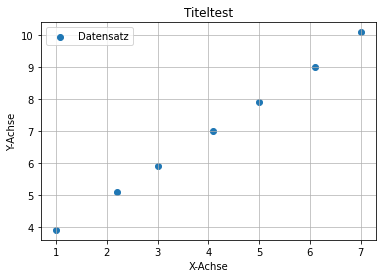

In [7]:
import numpy as np                 # Bibliothek für Rechnungen
import matplotlib.pyplot as plt    # Bibliothek fürs Plotten
dataX = [1, 2.2, 3, 4.1, 5, 6.1, 7]     # Daten für die x-Achse
dataY = [3.9, 5.1, 5.9, 7, 7.9, 9, 10.1]     # Daten für die y-Achse


plt.figure()         # öffnen der Figure, in die der Plot soll

plt.scatter(dataX,dataY, label='Datensatz')  # 'scatter' plottet pro Wertepaar einen Punkte
plt.title('Titeltest')                       # Titel
plt.xlabel('X-Achse')                      # Beschriftung x-Achse 
plt.ylabel('Y-Achse')                      # Beschriftung y-Achse
plt.grid(lw=0.7)                    # Linien/ein Gitter im Plot
plt.legend()                        # Legende, dazu muss bei plt.scatter/plot ein Label stehen                                 
plt.savefig('Name.pdf')            # Grafik speichern. "Name" durch gewünschten Dateinamen ersetzen
plt.show()                          # zeigt den Plot


**2.1) Code zur ersten Variante für die logartihmischen Plots - logratihmische y-Achse**

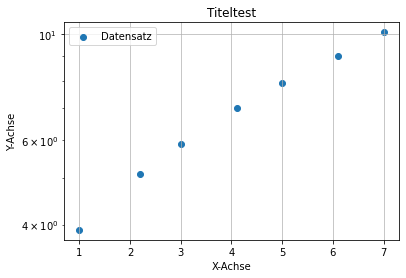

In [8]:
import numpy as np
import matplotlib.pyplot as plt


dataX = [1, 2.2, 3, 4.1, 5, 6.1, 7]     # Daten für die x-Achse
dataY = [3.9, 5.1, 5.9, 7, 7.9, 9, 10.1]     # Daten für die y-Achse

plt.figure()

plt.scatter(dataX,dataY, label='Datensatz')               # plot                                                   
plt.title('Titeltest')           # Titel 
plt.xlabel('X-Achse')          # Beschriftung der x-Achse 
plt.ylabel('Y-Achse')          # Beschriftung der y-Achse
plt.legend()            # Legende                               
plt.yscale('log')       # logartihmische y-Achse
plt.grid(lw=0.7)        # Gitter
plt.show()    

**2.2) Code zur zweiten Variante für die logartihmischen Plots - logratihmierte y-Werte auftragen**

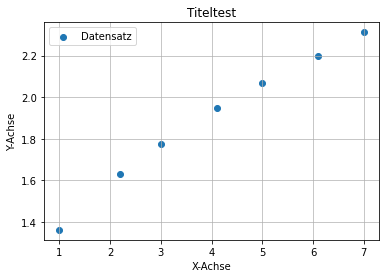

In [9]:
import numpy as np
import matplotlib.pyplot as plt

dataX = [1, 2.2, 3, 4.1, 5, 6.1, 7]     # Daten für die x-Achse
dataY = [3.9, 5.1, 5.9, 7, 7.9, 9, 10.1]     # Daten für die y-Achse

plt.figure()

plt.scatter(dataX,np.log(dataY), label='Datensatz')  # trägt dataX gegen den Logarithmus von dataY auf                                                     

plt.title('Titeltest')            # Titel 
plt.xlabel('X-Achse')           # Beschriftung der x-Achse 
plt.ylabel('Y-Achse')           # Beschriftung der y-Achse
plt.legend()             # Legende                                  
plt.grid(lw=0.7)         # Gitter
plt.show()               # Plot


**3) Vorlage für die lineare Regression**

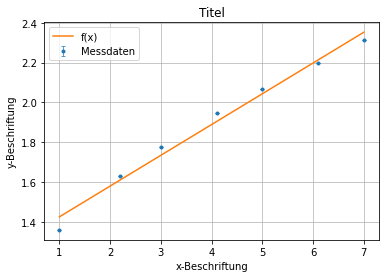

Steigung:  0.15426411540878376 ± 0.008616090949927237
Offsett:  1.2723716394114026 ± 0.0389239205501977


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt # Bibliothek für Optimierungsprobleme (lineare Regression)

from numpy import log,exp,sin,cos # so kann man direkt log, exp, ... verwenden und muss nicht "np.log " schreiben

dataX = [1, 2.2, 3, 4.1, 5, 6.1, 7]     # Daten für die x-Achse
dataY = [3.9, 5.1, 5.9, 7, 7.9, 9, 10.1]     # Daten für die y-Achse

x = dataX      # Umbennenung für Übersicht
y = log(dataY) # hier ebenfalls; der log() steht, falls logarithmierte y-Werte für die Regression verwenden werden,
               # Falls nicht, einfach NUR y = dataY

sigma = np.zeros(len(dataX))   # falls notwendig, hier Fehler für einzelne Werte eingeben

def f(x, a, b):  # Funktion, die gefittet werden soll
	return a*x+b 

p0 = [-1, 0] # Erste Schätzung für die Werte der finalen Funktion (von dort an wird nach den Parameter gesucht, die die Daten optimal beschreiben)

fit, err = opt.curve_fit(f, x, y, p0) # Fit-Parameter werden bestimmt
perr = np.sqrt(np.diag(err)) # Fehler-Rechnung der Fit-Parameter

plt.figure()

plt.errorbar(x, y, yerr = sigma ,marker='.', ls='', capsize=2, capthick=0.7, lw=0.7, label="Messdaten") # plot Messwerte
plt.plot(x, [f(x, *fit) for x in x], label="f(x)") # plot gefittete Funktion

#--------------Stil-----------------------
plt.title("Titel")
plt.xlabel("x-Beschriftung") # x-Beschriftung
plt.ylabel("y-Beschriftung") # y-Beschriftung
plt.grid(lw=0.7)             # Gitter
plt.legend()                 # Legende 
plt.savefig('Name.pdf')      # speichert die Grafik 
plt.show() 

#Ausgabe der Fitparameter
print('Steigung: ', fit[0], '±', perr[0])
print('Offsett: ', fit[1], '±', perr[1])